# Laboratorium 5.
Singular Value Decomposition

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Zadanie 1 - Przekształcenie sfery w elipsoidę

1. Korzystając z równania parametrycznego
$$
\mathbf{v} = \begin{bmatrix} \cos(s) \sin(t) \\ \sin(s) \sin(t) \\ \cos(t) \end{bmatrix}
$$

gdzie

$$
s \in [0, 2\pi], \quad t \in [0, \pi]
$$

została narysowana sfera w 3D


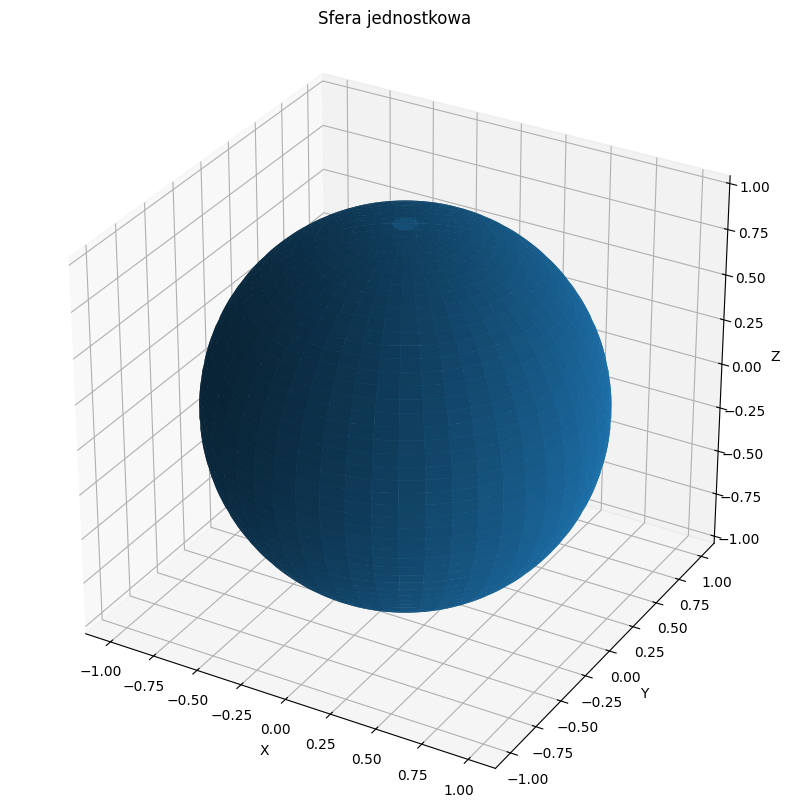

In [2]:
s = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 100) 
S, T = np.meshgrid(s, t)

X = np.cos(S) * np.sin(T)
Y = np.sin(S) * np.sin(T)
Z = np.cos(T)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_title("Sfera jednostkowa")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_aspect('equal')

plt.show()

Następnie wygenerowaliśmy 3 różne macierze $A_1, A_2$ i $A_3$ wymiarów 3x3, następnie mnożąc przez te macierze otrzymaliśmy elipsoide

[[4 4 2]
 [4 1 3]
 [0 1 1]]
[[1 1 2]
 [4 4 1]
 [0 1 3]]
[[4 1 4]
 [3 1 3]
 [2 1 1]]


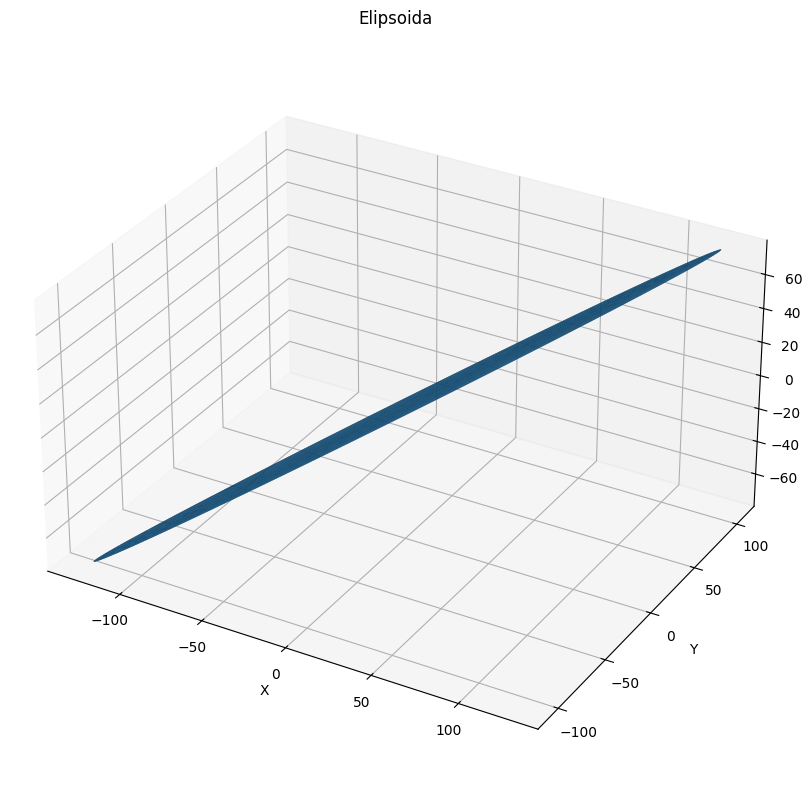

In [11]:

A1 = np.random.randint(5, size=(3,3))
A2 = np.random.randint(5, size=(3,3))
A3 = np.random.randint(5, size=(3,3))

print(A1, A2, A3, sep="\n")

s = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 100) 
S, T = np.meshgrid(s, t)

X = np.cos(S) * np.sin(T)
Y = np.sin(S) * np.sin(T)
Z = np.cos(T)

P = A1 @ [X.reshape(-1), Y.reshape(-1), Z.reshape(-1)]
P = A2 @ P
P = A3 @ P

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(P[0].reshape(100, 100), P[1].reshape(100, 100), P[2].reshape(100, 100))

ax.set_title("Elipsoida")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_aspect('equal')

plt.show()

Teraz dokonujemy SVD macierzy $A_i$. Na wykresie została stworzona kazda elipsoida wraz z odpowiadającymi jej wektorami przekształcenia (na czerwono)

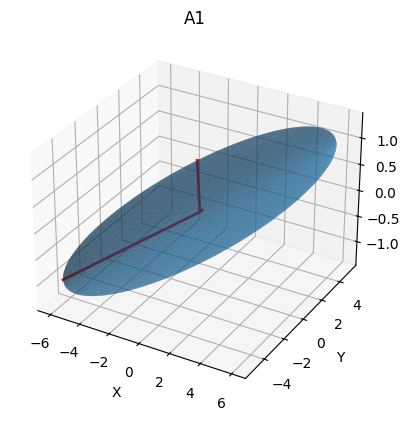

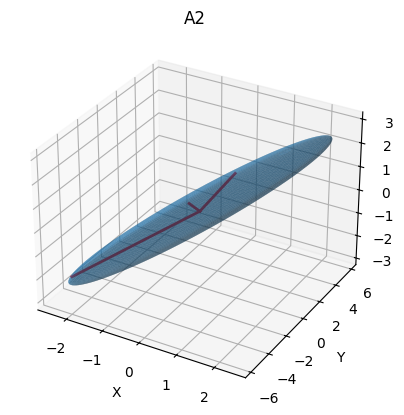

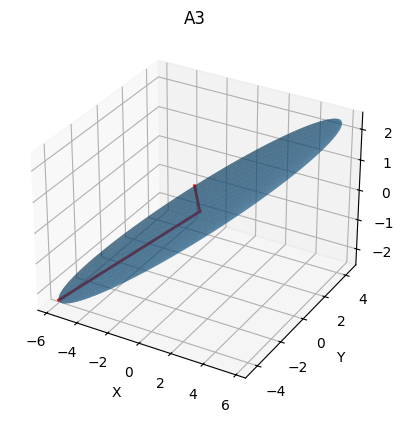

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_ellipsoid_with_svd(A, name):
    U, Sigma, Vt = np.linalg.svd(A)
    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))
    
    ellipsoid_x, ellipsoid_y, ellipsoid_z = A @ np.array([x.flatten(), y.flatten(), z.flatten()])
    ellipsoid_x = ellipsoid_x.reshape(x.shape)
    ellipsoid_y = ellipsoid_y.reshape(y.shape)
    ellipsoid_z = ellipsoid_z.reshape(z.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(ellipsoid_x, ellipsoid_y, ellipsoid_z,alpha=0.5, zorder=1)
    
    origin = np.zeros(3)
    for i in range(3):
        semi_axis = Sigma[i] * U[:, i]
        ax.plot([origin[0], semi_axis[0]], 
                [origin[1], semi_axis[1]], 
                [origin[2], semi_axis[2]], 'r-', linewidth=2, zorder=2)

    ax.set_title(name)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()


plot_ellipsoid_with_svd(A1, "A1")

plot_ellipsoid_with_svd(A2, "A2")

plot_ellipsoid_with_svd(A3, "A3")


Następnie została wygenerowana macierz z dużymi różnicami na wartości osobliwej, do tego przyda nam się ręczne stworzenie macierzy $\Sigma$ a następnie pomnożenie jej przez losowe macierze

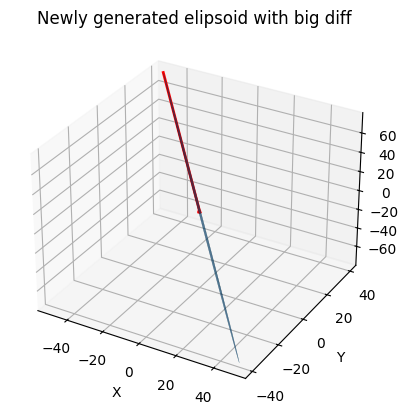

In [21]:
def generate_matrix_with_high_condition(ratio=100):
    singular_values = np.array([ratio, 1, 0.01])
    
    U, _ = np.linalg.qr(np.random.randn(3, 3))
    V, _ = np.linalg.qr(np.random.randn(3, 3))
    
    A = U @ np.diag(singular_values) @ V.T
    return A

plot_ellipsoid_with_svd(generate_matrix_with_high_condition(), "Newly generated elipsoid with big diff")

Pozostało jedynie dla wybranej macierzy (dla przykładu będzie to **$A_2$**) przedstawić następujące wizualizacje 
**$SV_i^T$ $S\Sigma_i V_i^T$** oraz **$SU_i\Sigma_i V_i^T$**, gdzie
**$$A_i = U_i\Sigma_i V_i^T$$**
a **S** Oznacza sferę z punktu 1

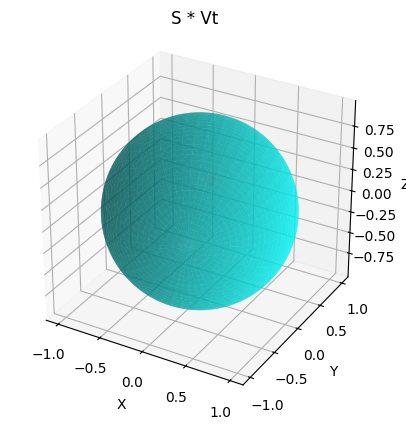

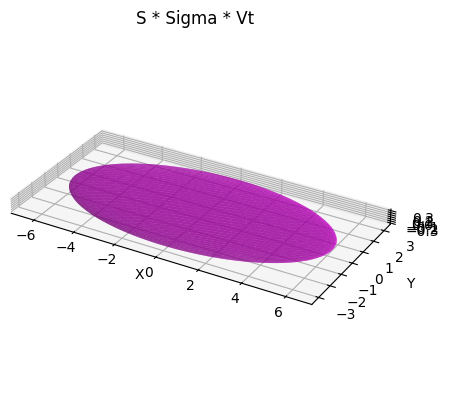

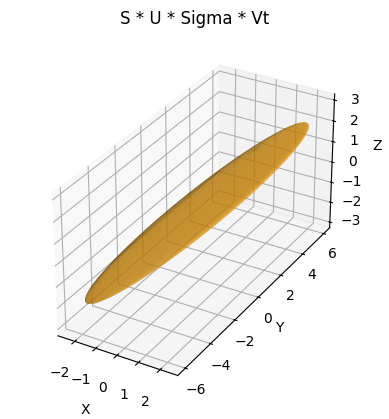

In [25]:
def create_visualisations(A):
    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(A)
    
    # Generate points on a unit sphere
    s = np.linspace(0, 2 * np.pi, 100)
    t = np.linspace(0, np.pi, 100)
    S, T = np.meshgrid(s, t)

    X = np.cos(S) * np.sin(T)
    Y = np.sin(S) * np.sin(T)
    Z = np.cos(T)

    # Flatten the sphere coordinates for transformation
    sphere_points = np.array([X.flatten(), Y.flatten(), Z.flatten()])  # Shape (3, 10000)

    # Apply the transformations step-by-step and reshape for plotting
    # 1. Transform with Vt
    P1 = Vt @ sphere_points
    P1 = P1.reshape(3, 100, 100)  # Reshape back to (3, 100, 100) for plotting

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P1[0], P1[1], P1[2], color='cyan', alpha=0.6)
    ax.set_aspect('equal')
    ax.set_title("S * Vt")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    # 2. Transform with Sigma (scaling by singular values)
    Sigma_matrix = np.diag(Sigma)  # Convert Sigma to a 3x3 matrix for multiplication
    P2 = Sigma_matrix @ P1.reshape(3, -1)
    P2 = P2.reshape(3, 100, 100)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P2[0], P2[1], P2[2], color='magenta', alpha=0.6)
    ax.set_aspect('equal')
    ax.set_title("S * Sigma * Vt")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    # 3. Transform with U
    P3 = U @ P2.reshape(3, -1)
    P3 = P3.reshape(3, 100, 100)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(P3[0], P3[1], P3[2], color='orange', alpha=0.6)
    ax.set_aspect('equal')
    ax.set_title("S * U * Sigma * Vt")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

create_visualisations(A2)

Jak widać macierz $U$ i $V^T$ odpowiadają za obrót a macierz $\Sigma$ odpowiada za rozciągnięcie wzdłuż wektorów, co było spodziewane

## Zadanie 2 - Kompresja obrazu

Wczytanie obrazu i przygotowanie odpowiadającej mu macierzy pikseli.

In [17]:
image = Image.open("image.png").convert("L")
I = np.asarray(image)

Obliczenie SVD macierzy pikseli.

In [18]:
U, S, VT = np.linalg.svd(I, full_matrices=False)

Przybliżenie obrazu (low rank approximation) z użyciem różnej liczby k pierwszych wartości osobliwych oraz porównanie wyników.

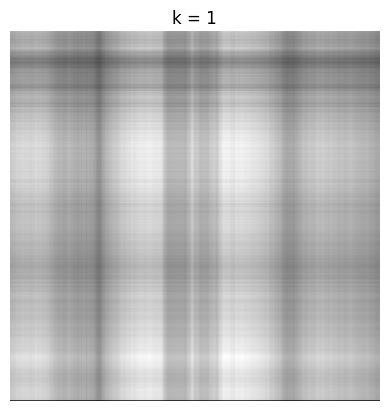

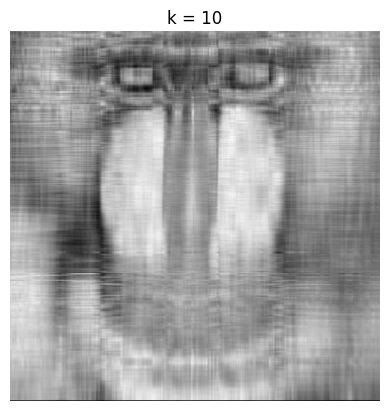

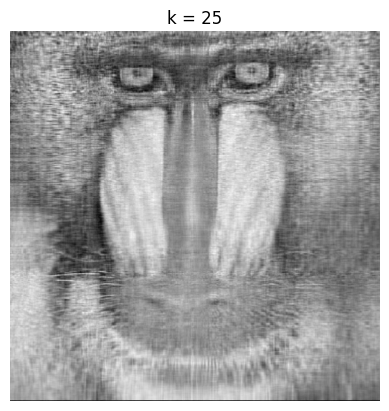

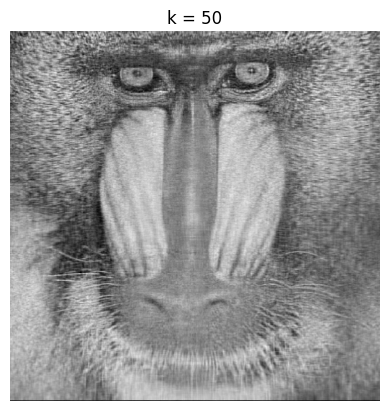

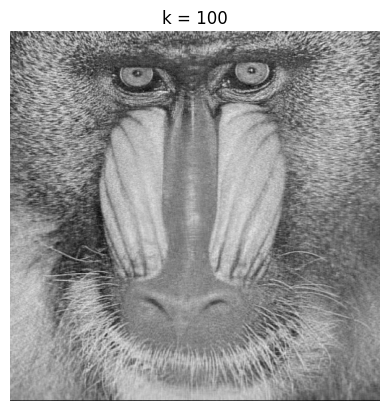

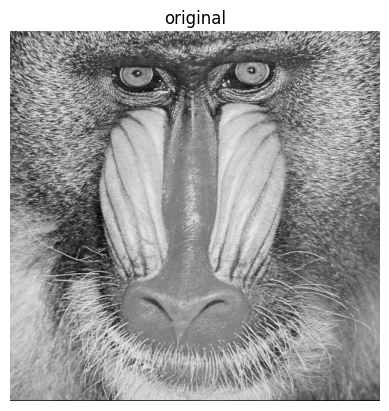

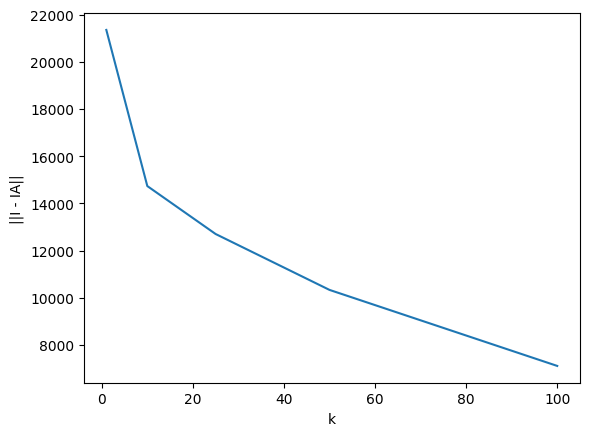

In [ ]:
K = [1, 10, 25, 50, 100]
N = []

for k in K:
    IA = S[:k] * U[:, :k] @ VT[:k, :]
    N.append(np.linalg.norm(I - IA))

    plt.imshow(IA, cmap='gray')
    plt.axis('off')
    plt.title(f'k = {k}')
    plt.show()

plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title(f'original')
plt.show()

plt.plot(K, N)
plt.title('Difference from source')
plt.xlabel('k')
plt.ylabel('||I - IA||')
plt.show()